<center> <h1> Predicting MLB batter on-base percentage </h1> </center>
<center> <h3> Kyle Rudman </h3> </center>

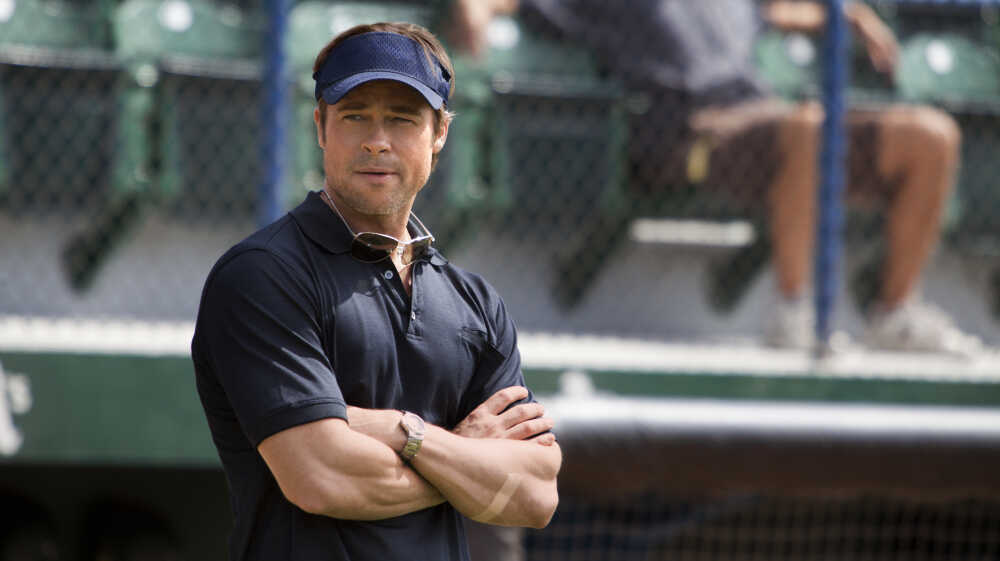

### Introduction

* Welcome to my personal tribute to Moneyball (2011) starring Brad Pitt. In this notebook, I will apply the power of Python to predict every MLB player's on-base percentages in the 2021 season. Using the obp.csv file as the dataset, I aim to create a predictive model that takes into account a player's plate appearances and on-base percentages in previous seasons to accurately forecast their on-base percentage for the 2021 season (which already happened). Finally, I will compare those predictions to the actual values and see just how accurate the models are.


* My approach to this problem will be as follows: 
    * Prepare the data and variables of interest in various ways and test multiple machine learning regression models.
    * Evaluate the models and choose the best-performing estimator based off its performance metrics.
    * Make the 2021 OBP predictions and see how they compare to the actual 2021 on-base-percentages.

In [1]:
# Import and clean data

import pandas as pd

df = pd.read_csv("obp.csv")
df = df.dropna()

# Filter the rows to rqequire a minimum 30 plate appearences in each season
# I chose 30 because it is common sample size threshold in traditional statistical analyses
df = df[(df['PA_21']>=30) & (df['PA_20']>=30) & (df['PA_19']>=30) & (df['PA_18']>=30) & (df['PA_17']>=30) & (df['PA_16']>=30)]
df.head()

,Name,playerid,birth_date,PA_21,OBP_21,PA_20,OBP_20,PA_19,OBP_19,PA_18,OBP_18,PA_17,OBP_17,PA_16,OBP_16
1,Mike Trout,10155,1991-08-07,146,0.466,241.0,0.390,600.0,0.438,608.0,0.460,507.0,0.442,681.0,0.441
2,Bryce Harper,11579,1992-10-16,599,0.429,244.0,0.420,682.0,0.372,695.0,0.393,492.0,0.413,627.0,0.373
3,Chris Owings,10030,1991-08-12,50,0.420,44.0,0.318,196.0,0.209,309.0,0.272,386.0,0.299,466.0,0.315
7,Byron Buxton,14161,1993-12-18,254,0.358,135.0,0.267,295.0,0.314,94.0,0.183,511.0,0.314,331.0,0.284
9,Brandon Belt,10264,1988-04-20,381,0.378,179.0,0.425,616.0,0.339,456.0,0.342,451.0,0.355,655.0,0.394


In [2]:
# Additional feature/variable creation that I think will be valuable in increasing model accuracy

# Calculate the number of times each player reached base in each season
for year in range(16,21):
    df['wPAxOBP_{}'.format(year)] = round((df['PA_{}'.format(year)] * df['OBP_{}'.format(year)]),0)

# Create a final column that represents each player's cumulative OBP from 2016 to 2020
df['OBP_16_20'] = (df['wPAxOBP_16']+df['wPAxOBP_17']+df['wPAxOBP_18']+df['wPAxOBP_19']+df['wPAxOBP_20']) / (df['PA_16']+df['PA_17']+df['PA_18']+df['PA_19']+df['PA_20'])
display(df)

,Name,playerid,birth_date,PA_21,OBP_21,PA_20,OBP_20,PA_19,OBP_19,PA_18,...,PA_17,OBP_17,PA_16,OBP_16,wPAxOBP_16,wPAxOBP_17,wPAxOBP_18,wPAxOBP_19,wPAxOBP_20,OBP_16_20
1,Mike Trout,10155,1991-08-07,146,0.466,241.0,0.390,600.0,0.438,608.0,...,507.0,0.442,681.0,0.441,300.0,224.0,280.0,263.0,94.0,0.440273
2,Bryce Harper,11579,1992-10-16,599,0.429,244.0,0.420,682.0,0.372,695.0,...,492.0,0.413,627.0,0.373,234.0,203.0,273.0,254.0,102.0,0.389051
3,Chris Owings,10030,1991-08-12,50,0.420,44.0,0.318,196.0,0.209,309.0,...,386.0,0.299,466.0,0.315,147.0,115.0,84.0,41.0,14.0,0.286224
7,Byron Buxton,14161,1993-12-18,254,0.358,135.0,0.267,295.0,0.314,94.0,...,511.0,0.314,331.0,0.284,94.0,160.0,17.0,93.0,36.0,0.292826
9,Brandon Belt,10264,1988-04-20,381,0.378,179.0,0.425,616.0,0.339,456.0,...,451.0,0.355,655.0,0.394,258.0,160.0,156.0,209.0,76.0,0.364446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Matt Adams,9393,1988-08-31,40,0.250,51.0,0.216,333.0,0.276,337.0,...,367.0,0.319,327.0,0.309,101.0,117.0,104.0,92.0,11.0,0.300353
560,Todd Frazier,785,1986-02-12,40,0.200,172.0,0.302,499.0,0.329,472.0,...,576.0,0.344,666.0,0.302,201.0,198.0,143.0,164.0,52.0,0.317820
565,Albert Almora Jr.,14109,1994-04-16,54,0.148,34.0,0.265,363.0,0.271,479.0,...,323.0,0.338,117.0,0.308,36.0,109.0,155.0,98.0,9.0,0.309271
568,Cameron Maybin,5223,1987-04-04,33,0.182,101.0,0.307,269.0,0.364,384.0,...,450.0,0.318,391.0,0.383,150.0,143.0,125.0,98.0,31.0,0.342947


### Establish model inputs

* Define key data and variables to be used later on

In [3]:
# Divide dataframe into features and denote 2021 OBP as the target variable

# The features I chose are all of the prior year OBP variables as well as the cumulative variable I created
features = df[['OBP_20', 'OBP_19', 'OBP_18', 'OBP_17', 'OBP_16', 'OBP_16_20']]
print('Features:')
display(features.head())

target = df['OBP_21']
print('\nTarget column: 2021 OBP')
display(target.head())

Features:


,OBP_20,OBP_19,OBP_18,OBP_17,OBP_16,OBP_16_20
1,0.390,0.438,0.460,0.442,0.441,0.440273
2,0.420,0.372,0.393,0.413,0.373,0.389051
3,0.318,0.209,0.272,0.299,0.315,0.286224
7,0.267,0.314,0.183,0.314,0.284,0.292826
9,0.425,0.339,0.342,0.355,0.394,0.364446



Target column: 2021 OBP


1    0.466
2    0.429
3    0.420
7    0.358
9    0.378
Name: OBP_21, dtype: float64

C:\Users\kyler\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


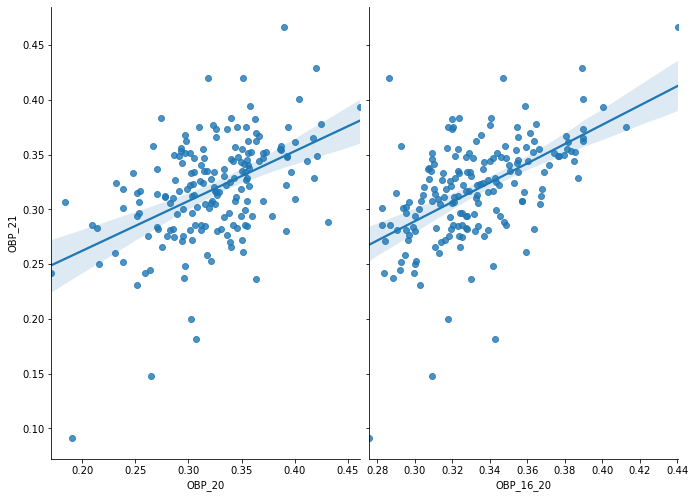

In [4]:
import seaborn as sns

# visualize the relationship between a couple features and the target variable using scatterplots
sns.pairplot(df, x_vars=['OBP_20', 'OBP_16_20'], y_vars='OBP_21', height=7, aspect=0.7, kind='reg')

In [5]:
from sklearn.model_selection import train_test_split

def split_the_dataset():
    
    # Divide the dataset into training and testing subsets to use for model evaluation
    
    return train_test_split(features, target, random_state=3000)

# Initialize training and testing sets
X_train, X_test, y_train, y_test = split_the_dataset()

In [6]:
# Import a variety of machine learning algorithms to allow for comparison and to choose the best performing model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a dictionary of regression model estimators to test with a looping function
estimators = {'Linear Regression': LinearRegression(), 
              'Ridge': Ridge(),
              'Lasso': Lasso(),
              'k-Nearest Neighbor': KNeighborsRegressor(),
              'Support Vector Machine': LinearSVR(max_iter=1000000), 
             }

estimators

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'k-Nearest Neighbor': KNeighborsRegressor(),
 'Support Vector Machine': LinearSVR(max_iter=1000000)}

### Test models

* Apply the regressors to the training dataset

In [7]:
def regressors():
    
    # Test the various machine learning algorithms and evaluate each model's coefficient of determination (R^2) and mean 
    # squared error metrics to compare the testing set's predicted 2021 OBP to the actual 2021 OBP
    
    # Iterate through the dictionary and use the key value to apply various estimators
    for estimator_name, estimator_object in estimators.items():
        
        model = estimator_object.fit(X=X_train, y=y_train)
        
        print('\n'+estimator_name+':')
        print("     R-squared value for testing set: ", round(float(r2_score(y_test, model.predict(X_test))),3))
        print("     MSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test))),3))
        print("     RMSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test), squared=False)),3))
        print("     MAE value for testing set: ", round(float(mean_absolute_error(y_test, model.predict(X_test))),3))
        
regressors()


Linear Regression:
     R-squared value for testing set:  0.471
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.035
     MAE value for testing set:  0.022

Ridge:
     R-squared value for testing set:  0.275
     MSE value for testing set:  0.002
     RMSE value for testing set:  0.04
     MAE value for testing set:  0.026

Lasso:
     R-squared value for testing set:  -0.002
     MSE value for testing set:  0.002
     RMSE value for testing set:  0.048
     MAE value for testing set:  0.032

k-Nearest Neighbor:
     R-squared value for testing set:  0.368
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.038
     MAE value for testing set:  0.024

Support Vector Machine:
     R-squared value for testing set:  0.481
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.034
     MAE value for testing set:  0.021


### Scale data and rerun models

* Scale the training data and attempt to improve model accuracy

In [8]:
def preprocessed_regression():
    
    # Iterate and attempt to improve upon the previous regressions by scaling the data
    
    # Scale training data to a min/max range (Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Iterate through the dictionary and use the key value to apply various estimators
    for estimator_name, estimator_object in estimators.items():
        model = estimator_object.fit(X=X_train_scaled, y=y_train)
        
        print('\n'+estimator_name+':')
        print("     R-squared value for testing set: ", round(float(r2_score(y_test, model.predict(X_test_scaled))),3))
        print("     MSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_scaled))),3))
        print("     RMSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_scaled), squared=False)),3))
        print("     MAE value for testing set: ", round(float(mean_absolute_error(y_test, model.predict(X_test_scaled))),3))
        
    return X_train_scaled, X_test_scaled

# Assign scaled data to reusable variables
X_train_scaled, X_test_scaled = preprocessed_regression()


Linear Regression:
     R-squared value for testing set:  0.471
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.035
     MAE value for testing set:  0.022

Ridge:
     R-squared value for testing set:  0.52
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.033
     MAE value for testing set:  0.021

Lasso:
     R-squared value for testing set:  -0.002
     MSE value for testing set:  0.002
     RMSE value for testing set:  0.048
     MAE value for testing set:  0.032

k-Nearest Neighbor:
     R-squared value for testing set:  0.392
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.037
     MAE value for testing set:  0.023

Support Vector Machine:
     R-squared value for testing set:  0.548
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.032
     MAE value for testing set:  0.02


### Perform feature selection on the scaled data and rerun models

* ^^^

In [9]:
def RFE_feature_selection():
    
    # Perform another iteration on the scaled data and select the 3 most important features
    
    # Use feature selection model to reweight features of model (Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
    from sklearn.feature_selection import RFE
    from sklearn.tree import DecisionTreeRegressor
    select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select=3)
    select.fit(X_train_scaled, y_train)
    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)

    # Iterate through the dictionary and use the key value to apply various estimators
    for estimator_name, estimator_object in estimators.items():
        model = estimator_object.fit(X=X_train_selected, y=y_train)
        
        print('\n'+estimator_name+':')
        print("     R-squared value for testing set: ", round(float(r2_score(y_test, model.predict(X_test_selected))),3))
        print("     MSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_selected))),3))
        print("     RMSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_selected), squared=False)),3))
        print("     MAE value for testing set: ", round(float(mean_absolute_error(y_test, model.predict(X_test_selected))),3))
    
    return X_train_selected, X_test_selected

# Assign scaled & selected data to reusable variables
X_train_selected, X_test_selected = RFE_feature_selection()


Linear Regression:
     R-squared value for testing set:  0.533
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.032
     MAE value for testing set:  0.021

Ridge:
     R-squared value for testing set:  0.527
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.033
     MAE value for testing set:  0.021

Lasso:
     R-squared value for testing set:  -0.002
     MSE value for testing set:  0.002
     RMSE value for testing set:  0.048
     MAE value for testing set:  0.032

k-Nearest Neighbor:
     R-squared value for testing set:  0.404
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.037
     MAE value for testing set:  0.023

Support Vector Machine:
     R-squared value for testing set:  0.523
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.033
     MAE value for testing set:  0.021


### Perform final regression and apply to original dataset

* Overall, both the linear regression and support vector machine estimators were most consistent.
* SVM slightly edges out its competition due to the marginally higher R^2 scores throughout the model evaluations.
* The R^2 values may not appear large on the scale of 0 to 1, but the threshold for a good R^2 value varies depending on the domain
    * Not all of baseball can be explained by a model-- it's random!
    * Therefore it's most useful as a tool for comparing different models and seeing how much of the variance IS explained
* For the final regression, I will use the SVM model on the scaled data since it yielded the highest R^2 score of all 15 models with little to no difference in mean error metrics.

In [10]:
def final_regression():
    
    # Perform final regression and output dataset
    
    # Use similar methodology for scaling data as before
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Scale the original features dataset as well because this time the predictions will apply to the whole dataset
    features_scaled = scaler.transform(features)

    model = LinearSVR(max_iter=1000000).fit(X=X_train_scaled, y=y_train)
    print('SVM regression on scaled OBP data:')
    print("     R-squared value for testing set: ", round(float(r2_score(y_test, model.predict(X_test_scaled))),3))
    print("     MSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_scaled))),3))
    print("     RMSE value for testing set: ", round(float(mean_squared_error(y_test, model.predict(X_test_scaled), squared=False)),3))
    print("     MAE value for testing set: ", round(float(mean_absolute_error(y_test, model.predict(X_test_scaled))),3))
    
    # Create predictions for entire dataset
    scaled_pred = model.predict(features_scaled)
    
    # Add predictions to original dataframe
    df["Predicted_OBP_21"] = scaled_pred
        
    return df

predictions = final_regression()

SVM regression on scaled OBP data:
     R-squared value for testing set:  0.547
     MSE value for testing set:  0.001
     RMSE value for testing set:  0.032
     MAE value for testing set:  0.02


### Examine results
* Compare predictions with actual values

In [11]:
# Side by side comparison for all players

pd.set_option('display.max_rows', None)
predictions[['Name', 'OBP_21', 'Predicted_OBP_21']].sort_values(by='OBP_21', ascending=False)

,Name,OBP_21,Predicted_OBP_21
1,Mike Trout,0.466,0.406928
2,Bryce Harper,0.429,0.374586
3,Chris Owings,0.420,0.284527
13,Yasmani Grandal,0.420,0.340231
46,Brandon Nimmo,0.401,0.382824
20,Corey Seager,0.394,0.341847
32,Freddie Freeman,0.393,0.391064
54,Starling Marte,0.383,0.326781
59,Yuli Gurriel,0.383,0.306560
83,Tony Kemp,0.382,0.332865


In [12]:
# Summary statistics on both distributions

predictions[['OBP_21', 'Predicted_OBP_21']].describe()

,OBP_21,Predicted_OBP_21
count,179.000000,179.000000
mean,0.317771,0.319610
std,0.047563,0.027415
min,0.091000,0.251803
25%,0.286000,0.301645
50%,0.320000,0.314446
75%,0.349000,0.338217
max,0.466000,0.406928


In [13]:
print("     MSE value for 2021 OBP vs. Predicted 2021 OBP: ", round(float(mean_squared_error(predictions['OBP_21'], predictions['Predicted_OBP_21'])),3))
print("     RMSE value for 2021 OBP vs. Predicted 2021 OBP: ", round(float(mean_squared_error(predictions['OBP_21'], predictions['Predicted_OBP_21'], squared=False)),3))
print("\nInterpretation:\n\tThe average difference between a player's 2021 OBP value predicted by the model and the actual value is 0.038.")

     MSE value for 2021 OBP vs. Predicted 2021 OBP:  0.001
     RMSE value for 2021 OBP vs. Predicted 2021 OBP:  0.038

Interpretation:
	The average difference between a player's 2021 OBP value predicted by the model and the actual value is 0.038.


Text(0.5, 1.0, 'Actual 2021 OBP vs. Predicted 2021 OBP Distributions')

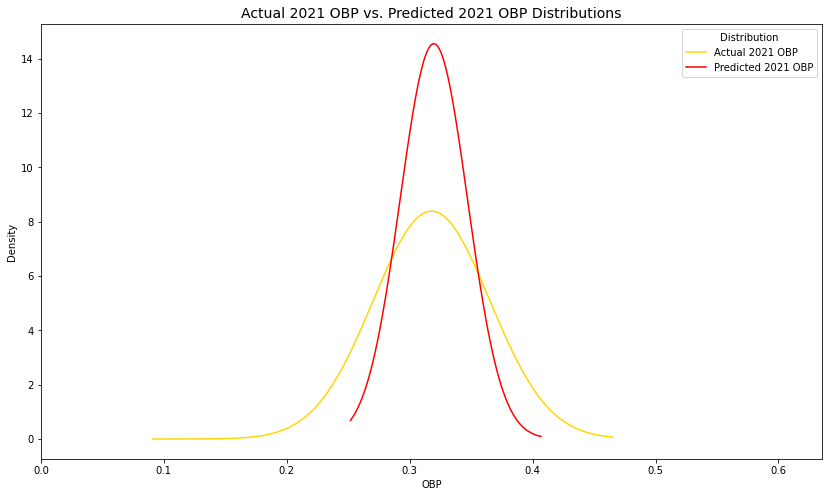

In [14]:
# Compare normal distribution of Predicted vs. Actual 2021 OBP (Source: https://www.statology.org/plot-normal-distribution-python/)

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# X-axis ranges for both sets
x1 = np.arange(predictions['OBP_21'].min(), predictions['OBP_21'].max(), 0.001)
x2 = np.arange(predictions['Predicted_OBP_21'].min(), predictions['Predicted_OBP_21'].max(), 0.001)

# Distribution mean/std
obp_mean = predictions['OBP_21'].mean()
obp_std = predictions['OBP_21'].std()
pobp_mean = predictions['Predicted_OBP_21'].mean()
pobp_std = predictions['Predicted_OBP_21'].std()

# Define multiple normal distributions
plt.rcParams["figure.figsize"] = (14,8)
plt.plot(x1, norm.pdf(x1, obp_mean, obp_std), label='Actual 2021 OBP', color='gold')
plt.plot(x2, norm.pdf(x2, pobp_mean, pobp_std), label='Predicted 2021 OBP', color='red')

# Add axes labels and a title
plt.legend(title='Distribution')
plt.xlim([0,2*predictions['OBP_21'].mean()]) 
plt.ylabel('Density')
plt.xlabel('OBP')
plt.title('Actual 2021 OBP vs. Predicted 2021 OBP Distributions', fontsize=14)

* As seen above, the predicted 2021 OBP distribution is more dense around the league average OBP as opposed to the actual 2021 OBP distribution.
* This dichotomy illustrates the long-standing universal baseball truth-- Regression to the mean.
* Forecasting the future performance for professional athletes often falls in line with career norms.
* A lot of variance in the actual 2021 OBP is explained by the model, but at its core: 
##### Baseball is truly random. Some hitters are just going to go out there and prove every model to be wrong about them!

#### Thanks for making it this far! Hope you enjoyed.
##### - Kyle